In [1]:
import matplotlib.pyplot as plt
import numpy as np

from astropy.io import fits
from numpy import ma

from shapelets.plot import *
from shapelets.shapelets import FittedShapeletPSF, save_model, load_model

## Shapelets

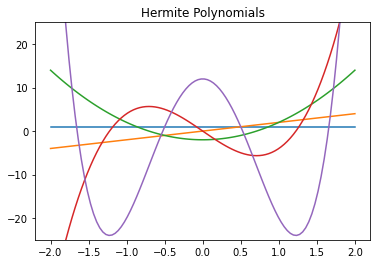

In [2]:
plot_hermite()

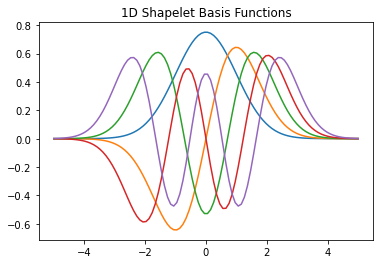

In [3]:
plot_phi1d()

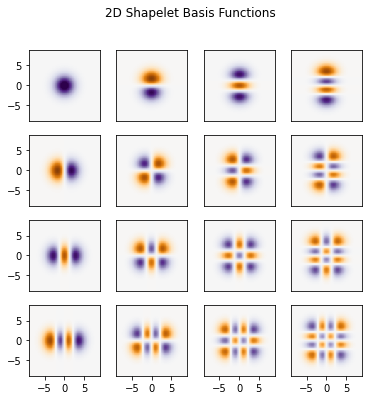

In [4]:
plot_phi2d()

### Example: PSF Fitting

In [5]:
image = fits.getdata("test_psf.fits")
image = ma.array(image, mask=np.zeros_like(image), fill_value=0)
assert np.isclose(np.sum(image), 1)
sigma = 3e-5 * np.ones_like(image)

In [6]:
data = []
for n_max in np.arange(10, 16):
    for scale in np.linspace(2, 4, 21):
        try:
            psf = FittedShapeletPSF(image, nmax=n_max, scale=scale, sigma=sigma)
            data.append([scale, n_max, psf.get_chi2red()])
        except:
            pass
data = np.array(data)

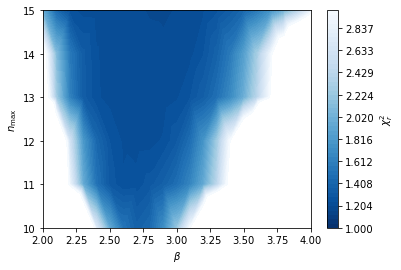

In [7]:
fig, ax = plt.subplots()

cont = ax.tricontourf(*np.transpose(data), np.linspace(1, 3, 50), cmap="Blues_r")

fig.colorbar(cont, ax=ax, label=r"$\chi^2_r$")

ax.set_xlabel(r"$\beta$")
ax.set_ylabel(r"$n_\mathrm{max}$")

plt.show()

In [8]:
#data[data[:,1] == 15]

In [9]:
psf = FittedShapeletPSF(image, nmax=15, scale=2.9, sigma=sigma)

In [10]:
psf

<FittedShapeletPSF shape=(31, 31) nmax=15 scale=2.9>

In [11]:
psf.get_chi2red()

1.2008944871117475

In [12]:
psf.get_flux()

0.999574316297084

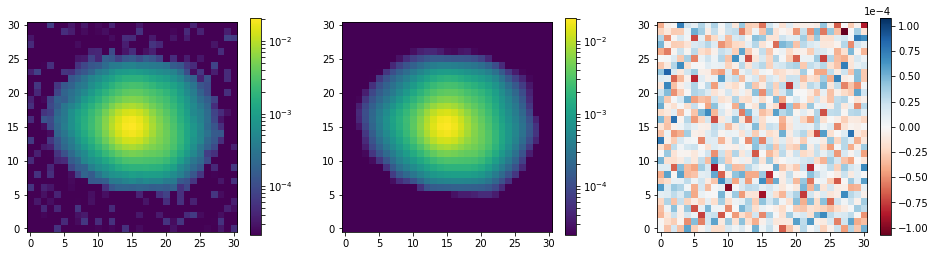

In [13]:
plot_psf_fit(psf)

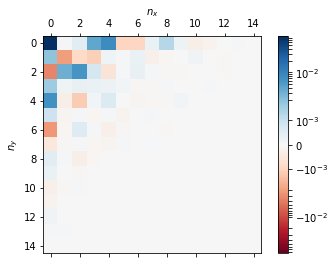

In [14]:
plot_psf_matrix(psf)

In [15]:
#save_model("model_psf.fits", psf)

In [16]:
#load_model("model_psf.fits")